<a href="https://colab.research.google.com/github/els326/nyu-python-public-policy/blob/master/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt 

In [0]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data_revised.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20,22,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df.head()

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
0,0,0,39888071,08/01/2018 12:00:10 AM,08/01/2018 01:52:46 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Other,10029,200 EAST 109 STREET,EAST 109 STREET,3 AVENUE,2 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:00:10 AM,The mobile outreach response team offered serv...,08/01/2018 01:52:46 AM,11 MANHATTAN,1.016560e+09,MANHATTAN,1000049.0,228317.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.793339,-73.942942,"(40.79333937834769, -73.9429417746998)",111.0
1,1,1,39889166,08/01/2018 12:00:26 AM,08/18/2018 10:46:43 AM,HPD,Department of Housing Preservation and Develop...,DOOR/WINDOW,DOOR,RESIDENTIAL BUILDING,10031,528 WEST 136 STREET,WEST 136 STREET,NaN,NaN,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,NaN,The Department of Housing Preservation and Dev...,08/18/2018 10:46:43 AM,09 MANHATTAN,1.019880e+09,MANHATTAN,997239.0,238074.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.820124,-73.953071,"(40.82012422332215, -73.9530712339799)",109.0
2,2,2,39882869,08/01/2018 12:00:54 AM,08/01/2018 12:49:55 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0
3,3,3,39894246,08/01/2018 12:01:00 AM,08/02/2018 10:30:00 PM,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10010,NaN,NaN,NaN,NaN,5 AVENUE,EAST 21 STREET,INTERSECTION,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,08/02/2018 10:30:00 PM,05 MANHATTAN,NaN,MANHATTAN,986878.0,208974.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740262,-73.990517,"(40.74026158873342, -73.99051651686905)",105.0
4,4,4,39881329,08/01/2018 12:01:00 AM,08/05/2018 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11413,121-28 198 STREET,198 STREET,120 AVENUE,122 AVENUE,NaN,NaN,ADDRESS,Springfield Gardens,NaN,NaN,Closed,NaN,NaN,08/05/2018 12:00:00 AM,12 QUEENS,4.126830e+09,QUEENS,1053308.0,190084.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688144,-73.750990,"(40.68814402968042, -73.75098958473612)",412.0


Step 1. Create a list of the top 10 complaint types (i.e. the complaint type categories that have the most records in our 311 dataset). Save the list as an object called top_10.

In [0]:
top_10 = df.groupby('complaint_type').size().nlargest(10).reset_index(name='count')
print(top_10)

                        complaint_type   count
0                  Noise - Residential  236350
1                       HEAT/HOT WATER  205985
2                      Illegal Parking  195159
3  Request Large Bulky Item Collection  177175
4                     Blocked Driveway  145446
5              Noise - Street/Sidewalk   95977
6                     Street Condition   93341
7                 UNSANITARY CONDITION   81713
8                         Water System   70509
9                                Noise   59007


Step 2. Filter the 311 dataset to only 311 requests that have complaint types in top_10. Save this subset of data as a dataframe called filtered_311.

In [0]:
filtered_311 = df[df['complaint_type'].isin(top_10['complaint_type'])]

In [0]:
# check
filtered_311.groupby('complaint_type').size().nlargest(10)

complaint_type
Noise - Residential                    236350
HEAT/HOT WATER                         205985
Illegal Parking                        195159
Request Large Bulky Item Collection    177175
Blocked Driveway                       145446
Noise - Street/Sidewalk                 95977
Street Condition                        93341
UNSANITARY CONDITION                    81713
Water System                            70509
Noise                                   59007
dtype: int64

Step 3. Convert the created_date column in filtered_311 to be a datetime series.

In [0]:
filtered_311.created_date = pd.to_datetime(filtered_311.created_date, format='%m/%d/%Y %I:%M:%S %p')

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [0]:
type(filtered_311.created_date)

pandas.core.series.Series

In [0]:
filtered_311.head()

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
2,2,2,39882869,2018-08-01 00:00:54,08/01/2018 12:49:55 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0
3,3,3,39894246,2018-08-01 00:01:00,08/02/2018 10:30:00 PM,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10010,NaN,NaN,NaN,NaN,5 AVENUE,EAST 21 STREET,INTERSECTION,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,08/02/2018 10:30:00 PM,05 MANHATTAN,NaN,MANHATTAN,986878.0,208974.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740262,-73.990517,"(40.74026158873342, -73.99051651686905)",105.0
4,4,4,39881329,2018-08-01 00:01:00,08/05/2018 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11413,121-28 198 STREET,198 STREET,120 AVENUE,122 AVENUE,NaN,NaN,ADDRESS,Springfield Gardens,NaN,NaN,Closed,NaN,NaN,08/05/2018 12:00:00 AM,12 QUEENS,4.126830e+09,QUEENS,1053308.0,190084.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688144,-73.750990,"(40.68814402968042, -73.75098958473612)",412.0
5,5,5,39882413,2018-08-01 00:01:09,08/01/2018 02:08:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11211,381 SOUTH 3 STREET,SOUTH 3 STREET,HOOPER STREET,HEWES STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:01:09 AM,The Police Department responded and upon arriv...,08/01/2018 02:08:54 AM,01 BROOKLYN,3.024250e+09,BROOKLYN,997494.0,197502.0,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708764,-73.952230,"(40.70876421021247, -73.95222986727623)",301.0
6,6,6,39884833,2018-08-01 00:01:10,08/05/2018 01:10:41 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10033,612 WEST 180 STREET,WEST 180 STREET,ST NICHOLAS AVENUE,WADSWORTH AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,08/01/2018 08:01:10 AM,The Police Department responded to the complai...,08/05/2018 01:10:41 AM,12 MANHATTAN,1.021620e+09,MANHATTAN,1002311.0,248532.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.848819,-73.934718,"(40.84881949308954, -73.93471813672973)",112.0


Step 4. Create 6 new columns in filtered_311 that extract each of the following from created_date

year
date
month
weekday
weekday_name
hour

In [0]:
filtered_311['year'] = filtered_311.created_date.dt.year
filtered_311['date'] = filtered_311.created_date.dt.date
filtered_311['month'] = filtered_311.created_date.dt.month
filtered_311['weekday_name'] = filtered_311.created_date.dt.weekday_name
filtered_311['weekday'] = filtered_311.created_date.dt.weekday
filtered_311['hour'] = filtered_311.created_date.dt.hour

filtered_311.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd,year,date,month,weekday_name,weekday,hour
2,2,2,39882869,2018-08-01 00:00:54,08/01/2018 12:49:55 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0,2018,2018-08-01,8,Wednesday,2,0
3,3,3,39894246,2018-08-01 00:01:00,08/02/2018 10:30:00 PM,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10010,NaN,NaN,NaN,NaN,5 AVENUE,EAST 21 STREET,INTERSECTION,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,08/02/2018 10:30:00 PM,05 MANHATTAN,NaN,MANHATTAN,986878.0,208974.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740262,-73.990517,"(40.74026158873342, -73.99051651686905)",105.0,2018,2018-08-01,8,Wednesday,2,0
4,4,4,39881329,2018-08-01 00:01:00,08/05/2018 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11413,121-28 198 STREET,198 STREET,120 AVENUE,122 AVENUE,NaN,NaN,ADDRESS,Springfield Gardens,NaN,NaN,Closed,NaN,NaN,08/05/2018 12:00:00 AM,12 QUEENS,4.126830e+09,QUEENS,1053308.0,190084.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688144,-73.750990,"(40.68814402968042, -73.75098958473612)",412.0,2018,2018-08-01,8,Wednesday,2,0
5,5,5,39882413,2018-08-01 00:01:09,08/01/2018 02:08:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11211,381 SOUTH 3 STREET,SOUTH 3 STREET,HOOPER STREET,HEWES STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:01:09 AM,The Police Department responded and upon arriv...,08/01/2018 02:08:54 AM,01 BROOKLYN,3.024250e+09,BROOKLYN,997494.0,197502.0,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708764,-73.952230,"(40.70876421021247, -73.95222986727623)",301.0,2018,2018-08-01,8,Wednesday,2,0
6,6,6,39884833,2018-08-01 00:01:10,08/05/2018 01:10:41 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10033,612 WEST 180 STREET,WEST 180 STREET,ST NICHOLAS AVENUE,WADSWORTH AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,08/01/2018 08:01:10 AM,The Police Department responded to the complai...,08/05/2018 01:10:41 AM,12 MANHATTAN,1.021620e+09,MANHATTAN,1002311.0,248532.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.848819,-73.934718,"(40.84881949308954, -73.93471813672973)",112.0,2018,2018-08-01,8,Wednesday,2,0


Step 5. Trends by hour

Find the count of 311 requests per hour and date for each complaint type:
Find the count of 311 requests per hour and date for each complaint type:

Hint: Use the pandas groupby function to aggregate the filtered_311 dataframe by hour, date, and complaint_type and count the number of 311 requests. Save the result as a new dataframe.

Find the median count of 311 requests per hour for each complaint type:

Hint: Group the new dataframe from Step A by hour and complaint type, getting the median of the counts across all the dates in each group. Save the result as a new dataframe.


In [0]:
count_date_hour = filtered_311.groupby(['hour','date','complaint_type']).size().reset_index(name='count_requests')

In [0]:
count_date_hour.head()

,hour,date,complaint_type,count_requests
0,0,2018-08-01,Blocked Driveway,8
1,0,2018-08-01,HEAT/HOT WATER,4
2,0,2018-08-01,Illegal Parking,11
3,0,2018-08-01,Noise,9
4,0,2018-08-01,Noise - Residential,29


In [0]:
median_date_hour = count_date_hour.groupby(['hour','complaint_type'])['count_requests'].median().reset_index(name='median_requests')

In [0]:
median_date_hour.head()

,hour,complaint_type,median_requests
0,0,Blocked Driveway,13.0
1,0,HEAT/HOT WATER,11.0
2,0,Illegal Parking,15.0
3,0,Noise,6.0
4,0,Noise - Residential,41.0


Produce a line plot that has 10 lines on it, one for each of the top 10 complaint types. The x values will be hours and the y values will be the median count of requests per complaint type. Use a for loop to produce the 10 lines all one one figure.

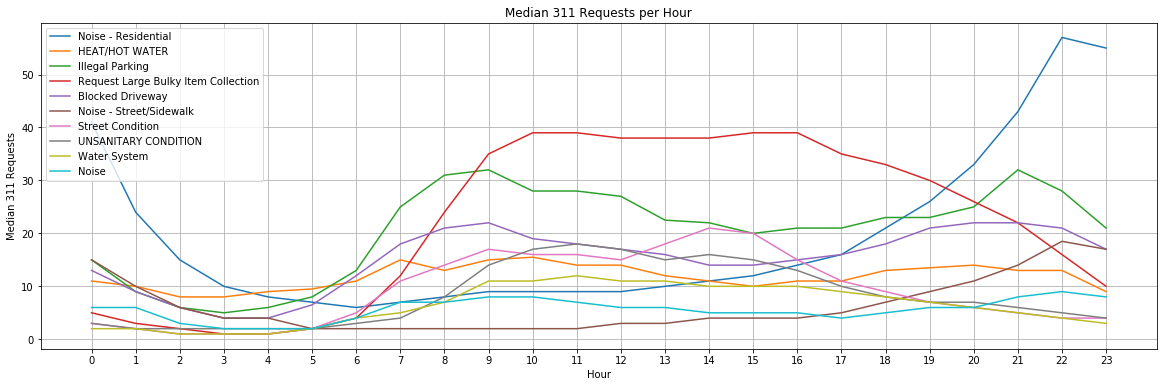

In [0]:
plt.figure(figsize=(20, 6))

for x in top_10.complaint_type:
  complaint_type1 = median_date_hour[median_date_hour.complaint_type==x]
  plt.plot(complaint_type1.hour, complaint_type1.median_requests, label = x)

plt.xticks(complaint_type1.hour)
plt.grid()
plt.title('Median 311 Requests per Hour')
plt.xlabel('Hour')
plt.ylabel('Median 311 Requests')
plt.legend()

Step 6: Trends by day of week

Reproduce the steps in 5, but this time aggregate by weekday, date, and complaint_type. Produce a similar plot where the x values will be the days of the week and the y values will be the median count of requests per complaint type.

In [0]:
count_weekday_date = filtered_311.groupby(['weekday','date','complaint_type']).size().reset_index(name='count_requests')
count_weekday_date.head()

,weekday,date,complaint_type,count_requests
0,0,2018-08-06,Blocked Driveway,373
1,0,2018-08-06,HEAT/HOT WATER,80
2,0,2018-08-06,Illegal Parking,473
3,0,2018-08-06,Noise,108
4,0,2018-08-06,Noise - Residential,303


In [0]:
median_weekday_date = count_weekday_date.groupby(['weekday','complaint_type'])['count_requests'].median().reset_index(name='median_requests')
median_weekday_date.head()

,weekday,complaint_type,median_requests
0,0,Blocked Driveway,372.0
1,0,HEAT/HOT WATER,292.0
2,0,Illegal Parking,509.0
3,0,Noise,147.0
4,0,Noise - Residential,419.0


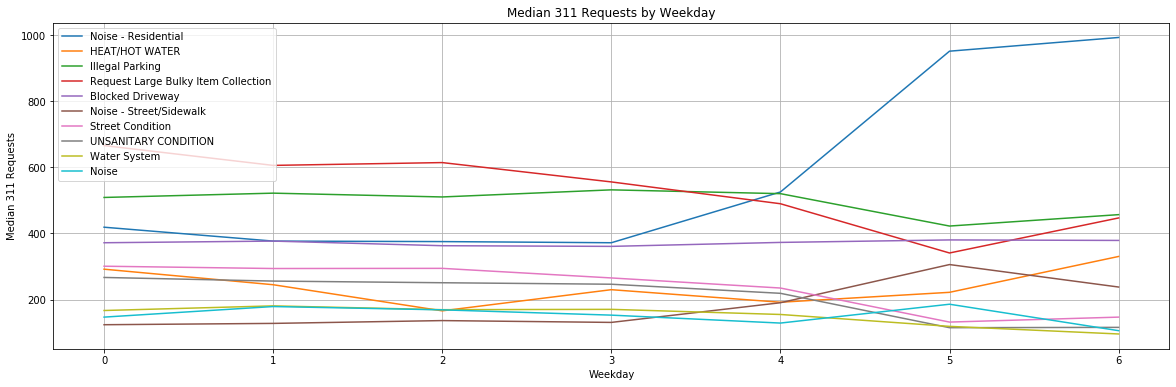

In [0]:
plt.figure(figsize=(20, 6))

for x in top_10.complaint_type:
  complaint_type1 = median_weekday_date[median_weekday_date.complaint_type==x]
  plt.plot(complaint_type1.weekday, complaint_type1.median_requests, label = x)

plt.xticks(complaint_type1.weekday)
plt.grid()
plt.title('Median 311 Requests by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Median 311 Requests')
plt.legend(loc=2)

Step 7. Trends by month

Reproduce the steps in 5, but this time aggregate by month, year (not date), and complaint_type. Produce a similar plot where x values will be days of the week and y values will be the median count of requests per complaint type

In [0]:
count_month_year = filtered_311.groupby(['month','year','complaint_type']).size().reset_index(name='count_requests')
count_month_year.tail()

,month,year,complaint_type,count_requests
123,12,2018,Noise - Street/Sidewalk,2344
124,12,2018,Request Large Bulky Item Collection,13956
125,12,2018,Street Condition,6214
126,12,2018,UNSANITARY CONDITION,6338
127,12,2018,Water System,5283


In [0]:
median_month_year = count_month_year.groupby(['month','complaint_type'])['count_requests'].median().reset_index(name='median_requests')
median_month_year.tail()

,month,complaint_type,median_requests
114,12,Noise - Street/Sidewalk,2344.0
115,12,Request Large Bulky Item Collection,13956.0
116,12,Street Condition,6214.0
117,12,UNSANITARY CONDITION,6338.0
118,12,Water System,5283.0


Why does median match count? Because there is only one value per complaint type per month. 

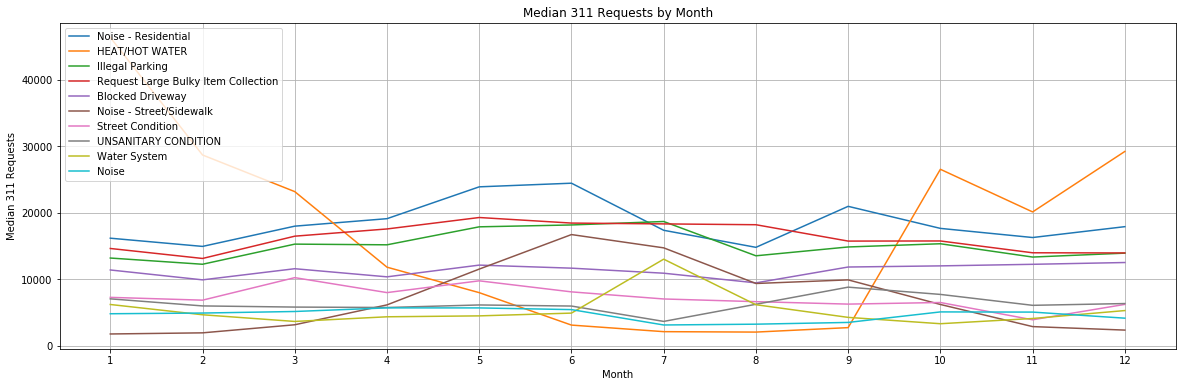

In [0]:
plt.figure(figsize=(20, 6))

for x in top_10.complaint_type:
  complaint_type1 = median_month_year[median_month_year.complaint_type==x]
  plt.plot(complaint_type1.month, complaint_type1.median_requests, label = x)

plt.xticks(complaint_type1.month)
plt.grid()
plt.title('Median 311 Requests by Month')
plt.xlabel('Month')
plt.ylabel('Median 311 Requests')
plt.legend(loc=2)

Step 8. Write a few sentences about your observations on how the occurrence of different complaint types varies over time, informed by the charts you produced in Steps 5-7.

The seasons influence some complaint types. For instance, we see heat/hot water complaints decreasing dramatically throughout the spring, remaining flat in the summer, and increasing dramatically in the fall. The reverse is true for water system and street noise - these types of complaints increase in the summer, probably when people are trying to cool down with showers and there are a lot of festivals and fun things going on outside.

Noise complaints spike on the weekends and at the end of the day, which makes sense since some people will be at home relaxing and will be disturbed by noise, others will be home having a party and could get noisy.

Aside from noise complaints, most complaints are submitted during the day and tail down at night and into the early morning. This is probably because people notice certain issues while they're out and about or take care of chores during the day - e.g. illegally parked cars and bulky item collection.